**Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly

In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

**Data Collection and Analysis**

In [ ]:
# Loading the data from csv to pandad dataframe
customer_data=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# finding the number of rows and column
customer_data.shape

(200, 5)

There are 200 rows and 5 columns

In [ ]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Checking for duplicates
customer_data.duplicated().sum()


0

There are no duplicate values in the dataset

From the above info we can say that there is no values present in the dataset.

**DATA VISUALIZATION**

**Gender**

In [ ]:
# calculate the gender count
gender_count=customer_data["Gender"].value_counts()
print(gender_count)

Female    112
Male       88
Name: Gender, dtype: int64


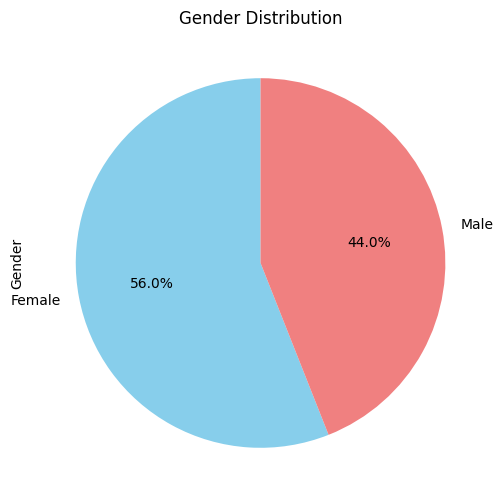

In [ ]:
plt.figure(figsize=(6,6))
customer_data["Gender"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.show()

Data set has 56 % of Female and 44% male.

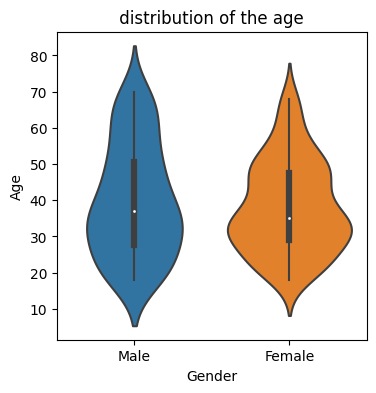

In [ ]:
# Visualize the distribution of the age column using violin part
plt.figure(figsize=(4,4))
sns.violinplot(x="Gender",y="Age",data=customer_data)
plt.title(" distribution of the age ")
plt.show()


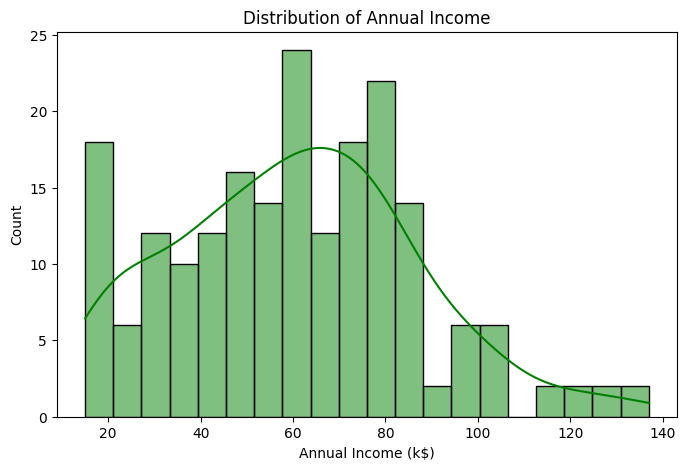

In [ ]:
# Visualize the distribution of Annual Income column
plt.figure(figsize=(8, 5))
sns.histplot(customer_data["Annual Income (k$)"], bins=20, color='green', kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

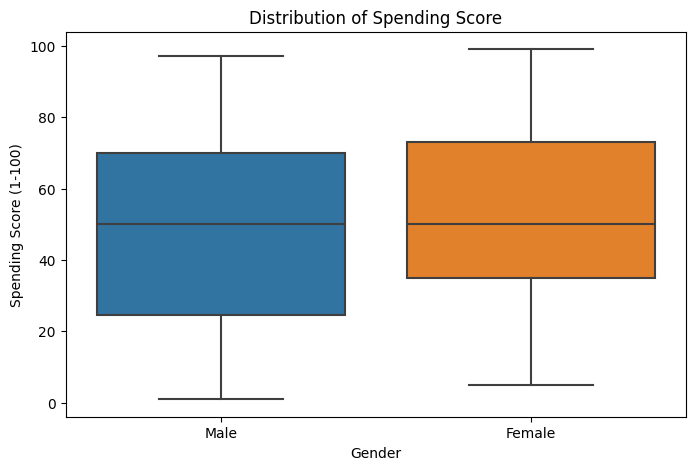

In [ ]:
# visualize the distribution of the spending score
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=customer_data)
plt.title('Distribution of Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Performing K-means Clustering**

In [ ]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

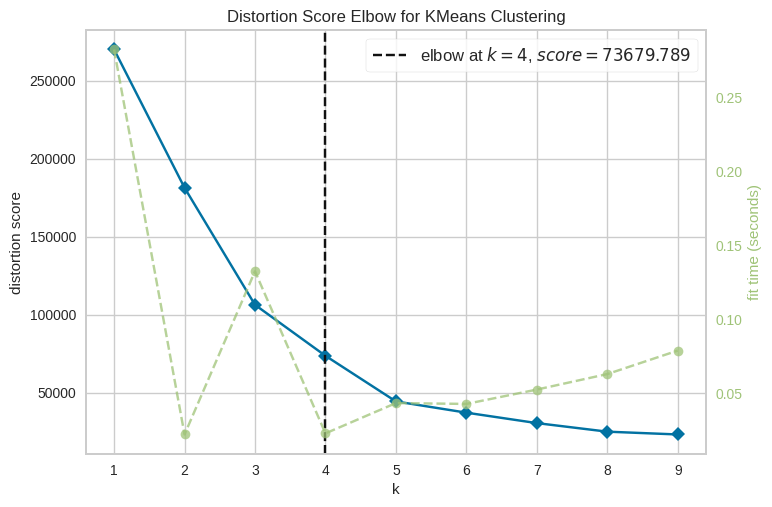

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Selecting best value of k using elbow method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create the KElbowVisualizer with the KMeans model and the range of k values
visualizer = KElbowVisualizer(KMeans(), k=(1, 10))

# Fit the visualizer to the data
visualizer.fit(X)

# Display the visualization
visualizer.poof()

From the above elbow graph we can say the best value of K would be 5

In [ ]:
# training the kmeans clustering algorithm

kmeans=KMeans(n_clusters=5,init = "k-means++",random_state=42)
y=kmeans.fit_predict(X)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

km = KMeans(n_clusters=5, random_state=42)
customer_data['Clusters'] = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


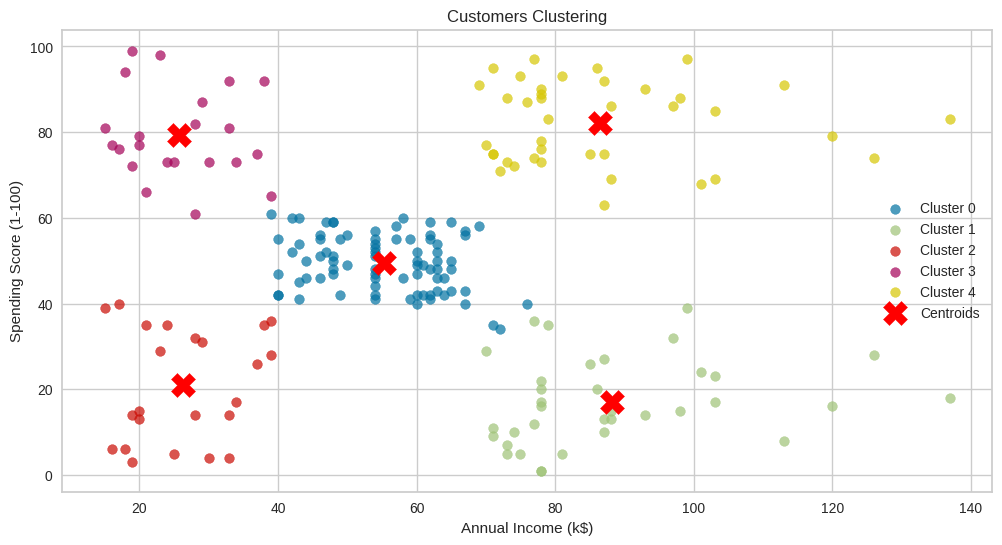

In [ ]:
plt.figure(figsize=(12, 6))
for cluster in range(k_clusters):
    plt.scatter(X[customer_data['Clusters'] == cluster]['Annual Income (k$)'],
                X[customer_data['Clusters'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customers Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 0 represent the group of customers with medium annual income and medium spending score

Cluster 1 represent the group of customers with high annual income and low spending score

Cluster 2 represent the group of customers with low  annual income and low spending score

Cluster 3  represent the group of customers with low annual income and high spending score

Cluster 4 represent the group of customers with high annual income and high spending score

**CONCLUSION:**

From the above we can say that we can give more discounts to cluster 1 and cluster 2 customers , so that it encourage them to buy more products.